In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import boxcox , skew , zscore
import plotly.express as px


In [3]:
df = pd.read_csv('../datasets/Stock Market Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [5]:
df = df.drop(['Unnamed: 0', 'Date'], axis=1)

In [6]:
df.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,NaN,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,NaN,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,NaN,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,NaN,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,NaN,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [7]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float, errors='ignore')


In [8]:
df= pd.DataFrame(df)
df.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,NaN,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN
1,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,NaN,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,NaN,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,NaN,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,NaN,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0


In [9]:
gold_p = df.pop('Gold_Price')
df['Gold_Price']=gold_p

In [10]:
df.tail()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.,Gold_Price
1238,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.20,NaN,...,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,150610.0,1318.5
1239,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.80,NaN,...,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,166760.0,1314.2
1240,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.10,NaN,...,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,137250.0,1314.4
1241,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,NaN,...,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,129010.0,1319.2
1242,2.660,116490.0,54.56,622470.0,2.7975,490.0,3462.8,503920.0,822.50,NaN,...,312000.0,310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0,159560.0,1319.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  1243 non-null   float64
 1   Natural_Gas_Vol.   1239 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Crude_oil_Vol.     1220 non-null   float64
 4   Copper_Price       1243 non-null   float64
 5   Copper_Vol.        1206 non-null   float64
 6   Bitcoin_Price      1243 non-null   float64
 7   Bitcoin_Vol.       1243 non-null   float64
 8   Platinum_Price     1243 non-null   float64
 9   Platinum_Vol.      636 non-null    float64
 10  Ethereum_Price     1243 non-null   float64
 11  Ethereum_Vol.      1243 non-null   float64
 12  S&P_500_Price      1243 non-null   float64
 13  Nasdaq_100_Price   1243 non-null   float64
 14  Nasdaq_100_Vol.    1242 non-null   float64
 15  Apple_Price        1243 non-null   float64
 16  Apple_Vol.         1243 

In [12]:
df.describe()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.,Gold_Price
count,1243.000000,1239.000000,1243.000000,1.220000e+03,1243.000000,1206.000000,1243.000000,1.243000e+03,1243.000000,636.000000,...,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1241.000000,1243.000000
mean,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,25241.903057,4.033918e+07,959.003620,9082.515723,...,404273.051488,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,211127.671233,1759.246742
std,1.822540,64385.141749,20.465500,2.161619e+05,0.702819,38415.448731,16029.009055,2.940889e+08,108.012849,8876.538587,...,86369.903899,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,115006.351292,203.258901
min,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,3397.700000,2.600000e+02,595.200000,0.000000,...,240000.000000,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,0.000000,1272.000000
25%,2.347500,91900.000000,55.095000,2.835975e+05,2.858750,370.000000,10014.600000,7.907500e+04,889.775000,1120.000000,...,318984.500000,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,152200.000000,1669.600000
50%,2.702000,127370.000000,69.230000,3.668850e+05,3.666000,10180.000000,23055.100000,2.153100e+05,944.700000,6070.000000,...,418349.000000,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,197970.000000,1804.200000
75%,4.055500,169460.000000,80.455000,5.072425e+05,4.137250,68340.000000,37784.200000,6.151050e+05,1020.400000,15287.500000,...,471500.000000,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,257920.000000,1912.800000
max,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,42830.000000,...,589498.000000,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000,2089.700000


In [13]:
df = df.fillna(df.mean())

In [14]:
df.shape

(1243, 37)

Correlations

In [15]:
stock_prices = df.corr()['Gold_Price'][:-1] 
top_features = stock_prices[abs(stock_prices) > 0.5].sort_values(ascending=False) 
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 14 strongly correlated values with SalePrice:
Apple_Price         0.848809
Microsoft_Price     0.826407
Silver_Price        0.817131
Nasdaq_100_Price    0.806165
S&P_500_Price       0.742476
Nvidia_Price        0.727522
Google_Price        0.697758
Tesla_Price         0.689413
Berkshire_Price     0.674349
Copper_Price        0.607146
Berkshire_Vol.      0.606370
Amazon_Price        0.592969
Bitcoin_Price       0.538874
Ethereum_Price      0.534024
Name: Gold_Price, dtype: float64


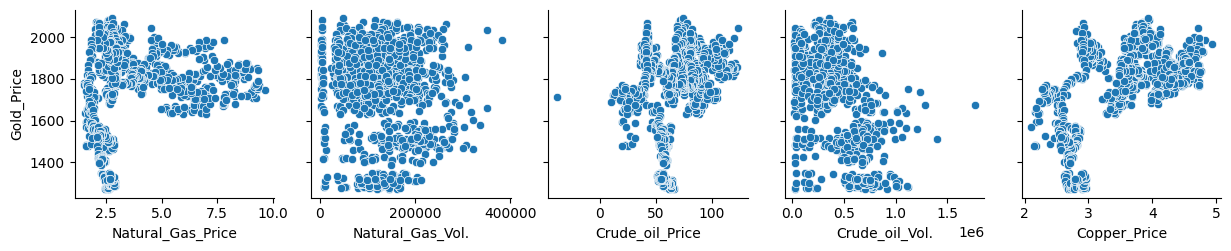

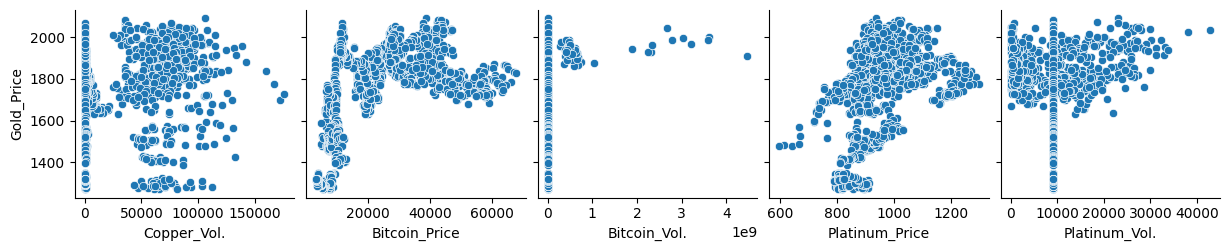

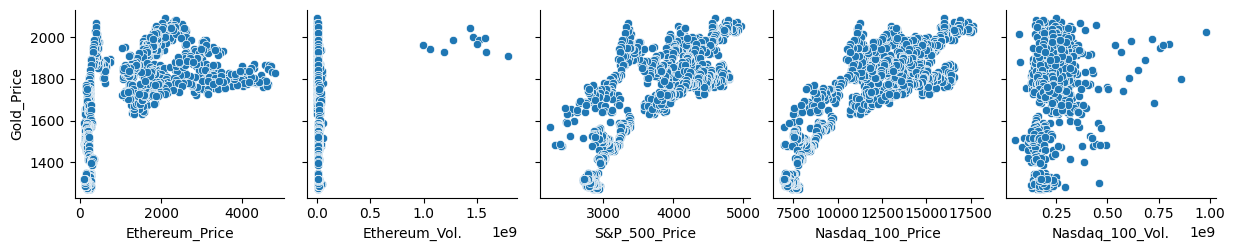

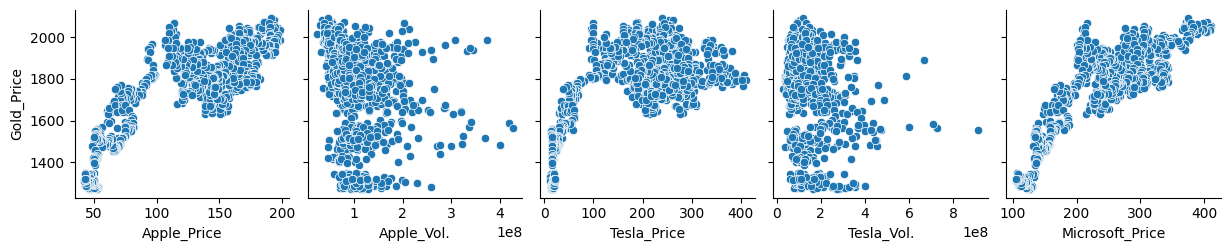

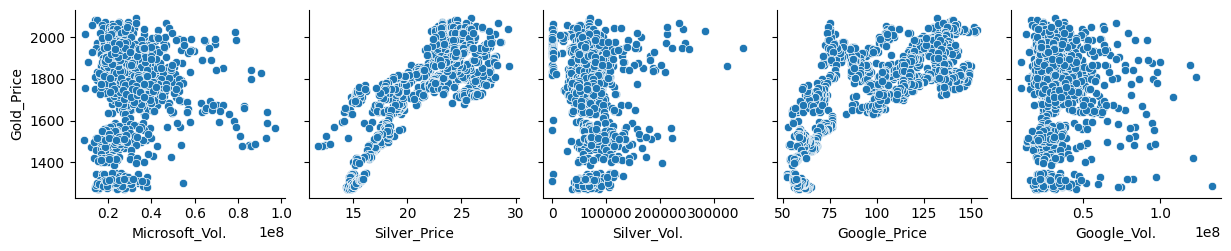

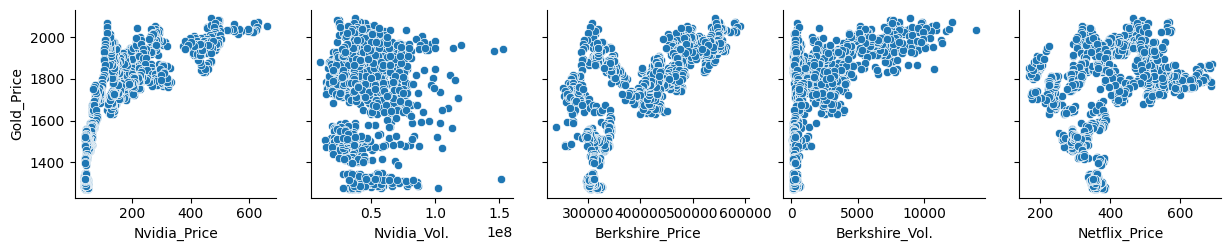

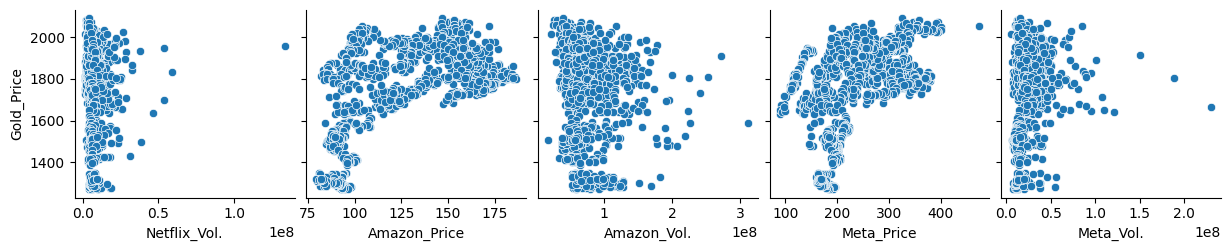

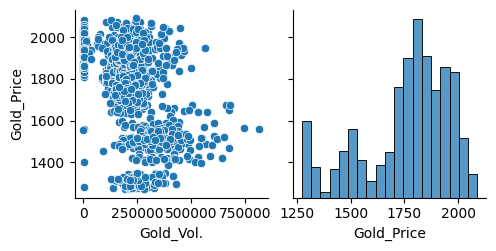

In [16]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Gold_Price'])

Looking at the target value (in this EDA i considered Gold price as the basis for comparisons)

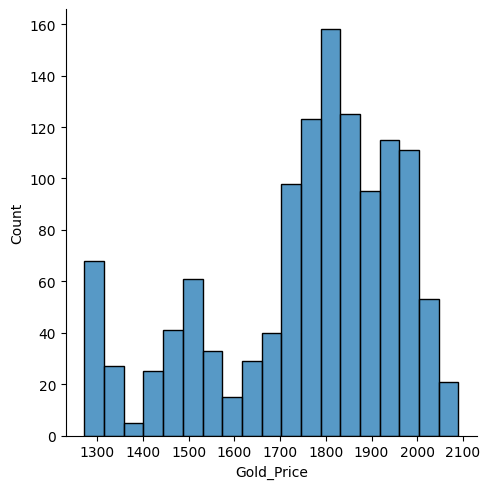

In [64]:
sns.displot(df.Gold_Price)

analysing the distribution type

In [66]:
print("Skewness: %f" % df['Gold_Price'].skew())

Skewness: -0.838829


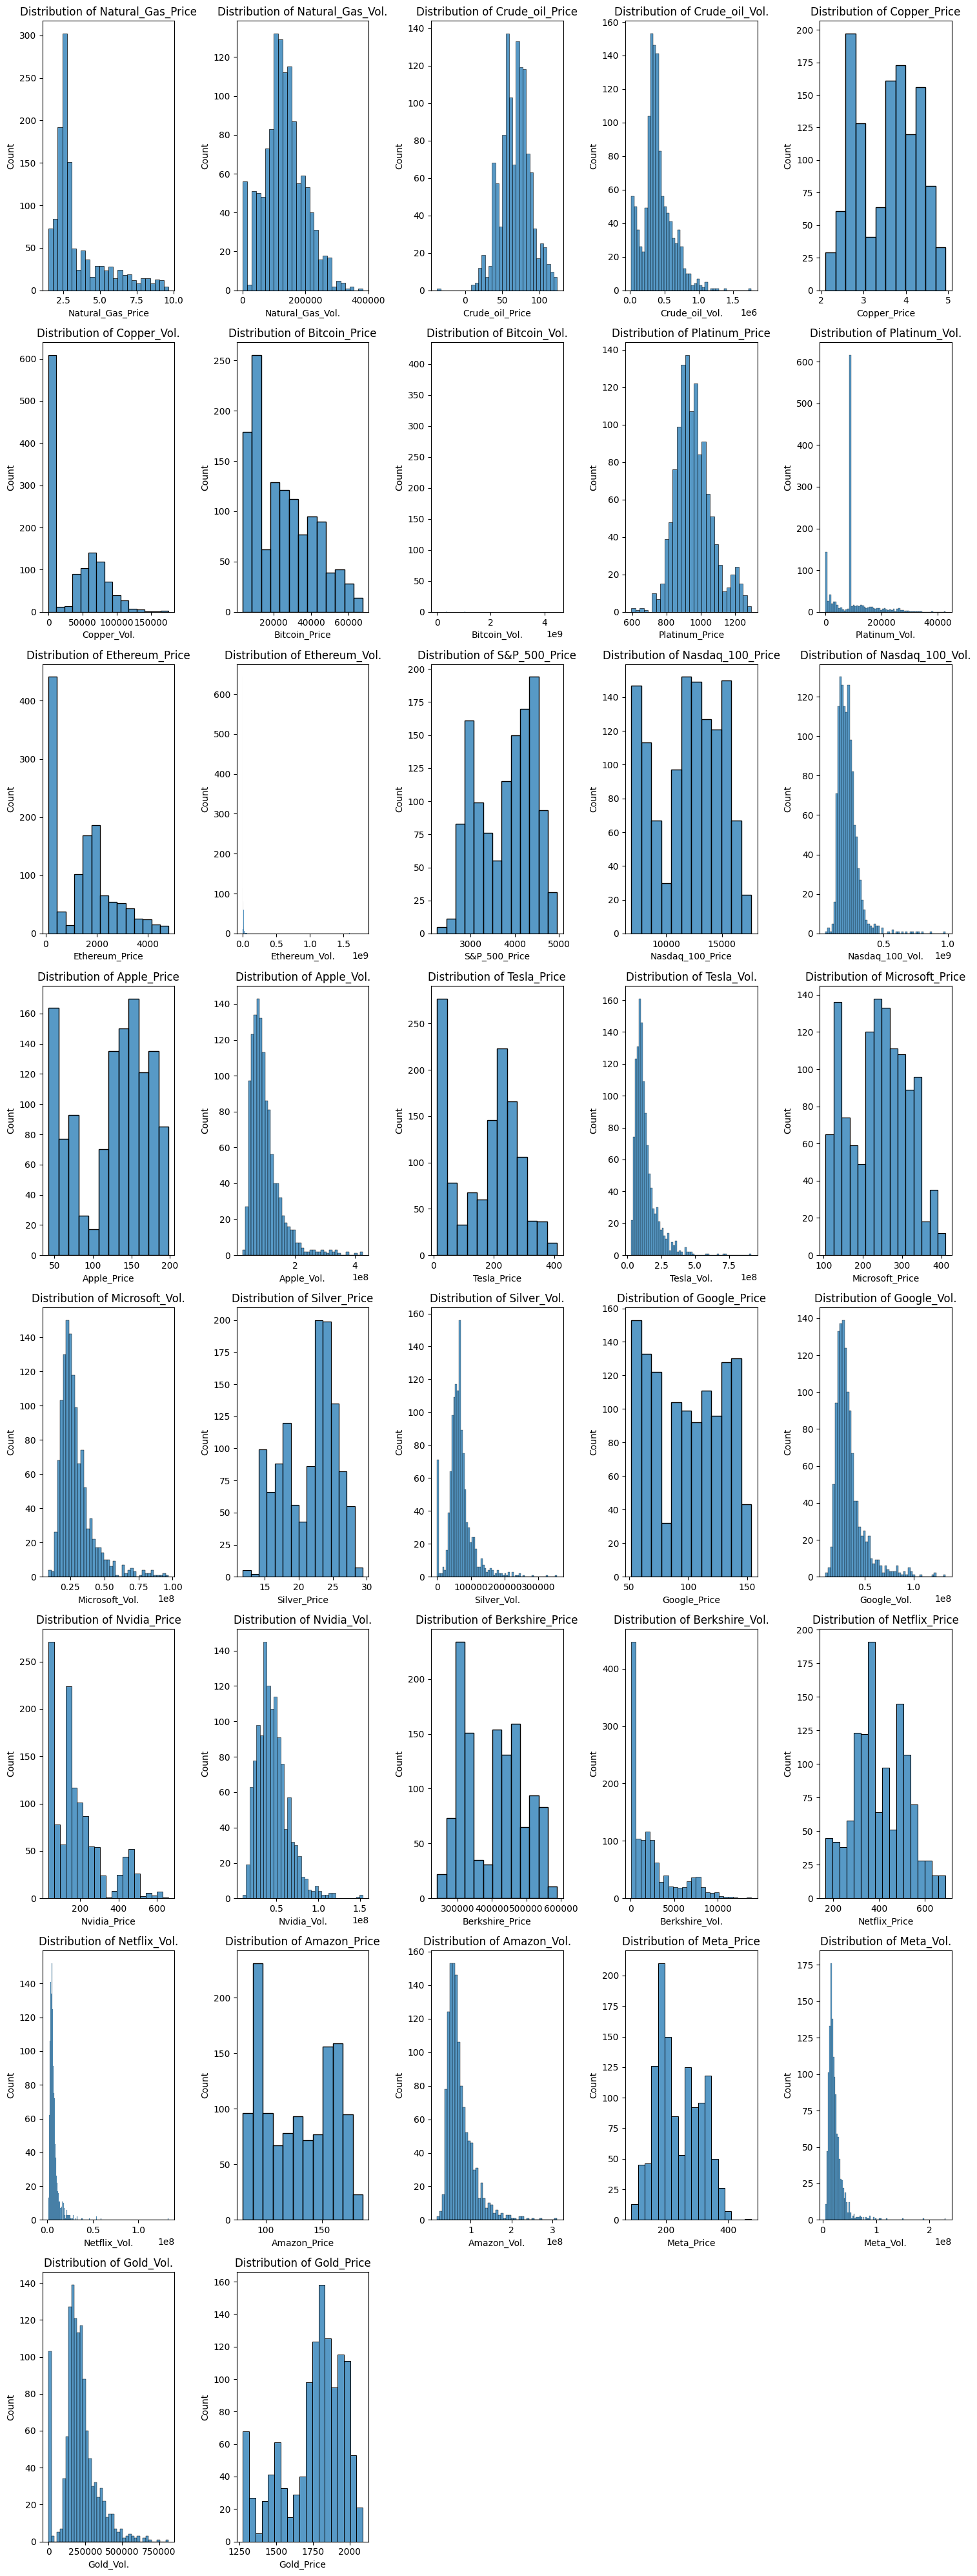

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = 5
num_rows = (len(df.columns) // num_columns) + (1 if len(df.columns) % num_columns != 0 else 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [98]:
bc = boxcox(df['Gold_Price'])
bc[0]

array([2.93921107e+13, 3.04665994e+13, 3.02356410e+13, ...,
       4.39980663e+12, 4.46859272e+12, 4.47003446e+12])

Skewness: -0.172723


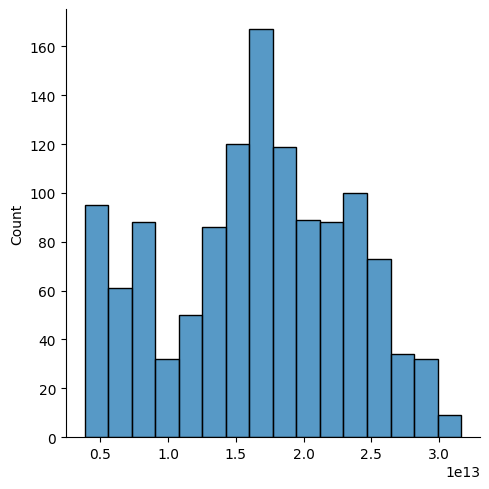

In [102]:
sns.displot(bc[0])
print("Skewness: %f" % df['Gold_Price'].skew())

In [21]:
ss = StandardScaler()
scaled_array =ss.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)

<Axes: xlabel='Natural_Gas_Price'>

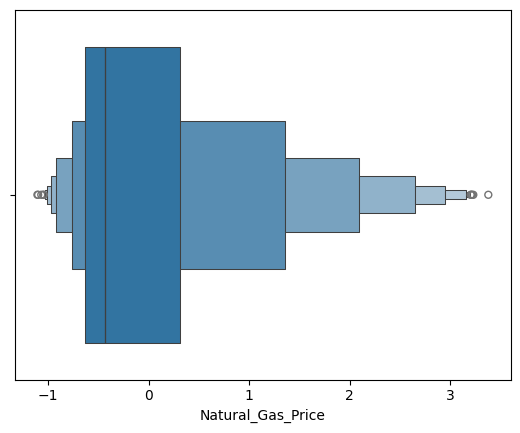

In [109]:
sns.boxenplot(x =scaled_df['Natural_Gas_Price'])